Using TensorFlow backend.


C:\Users\herma\Apps\master-thesis\src\utils
C:\Users\herma\Apps\master-thesis
Columns before removal: 
Col. 0 : FYN0111 - Gasseksport rate
Col. 1 : TT0102_MA_Y - Varm side A temperatur inn
Col. 2 : TIC0101_CA_YX - Varm side A temperatur ut
Col. 3 : TT0104_MA_Y - Varm side B temperatur inn
Col. 4 : TIC0103_CA_YX - Varm side B temperatur ut
Col. 5 : TT0106_MA_Y - Varm side C temperatur inn
Col. 6 : TIC0105_CA_YX - Varm side C temperatur ut
Col. 7 : PDT0108_MA_Y - Varm side A trykkfall
Col. 8 : PDT0119_MA_Y - Varm side B trykkfall
Col. 9 : PDT0118_MA_Y - Varm side C trykkfall
Col. 10 : PIC0104_CA_YX - Innløpsseparator trykk
Col. 11 : TIC0425_CA_YX - Kald side temperatur inn
Col. 12 : TT0651_MA_Y - Kald side A temperatur ut
Col. 13 : TT0652_MA_Y - Kald side B temperatur ut
Col. 14 : TT0653_MA_Y - Kald side C temperatur ut
Col. 15 : TIC0101_CA_Y - Kald side A ventilåpning
Col. 16 : TIC0103_CA_Y - Kald side B ventilåpning
Col. 17 : TIC0105_CA_Y - Kald side C ventilåpning

Columns after remov

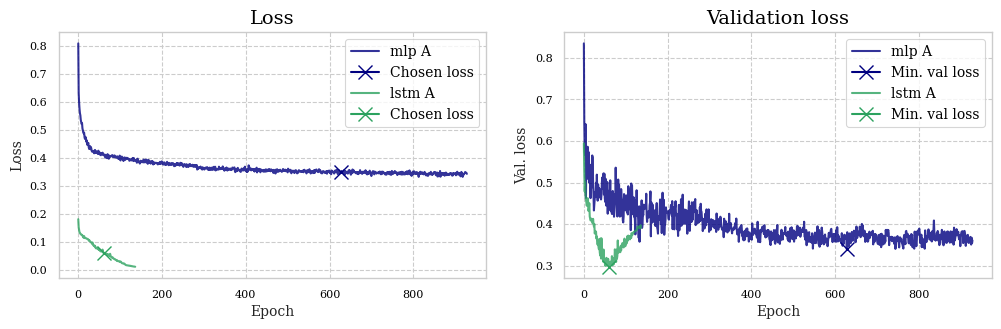

Columns before removal: 
Col. 0 : FYN0111 - Gasseksport rate
Col. 1 : TT0102_MA_Y - Varm side A temperatur inn
Col. 2 : TIC0101_CA_YX - Varm side A temperatur ut
Col. 3 : TT0104_MA_Y - Varm side B temperatur inn
Col. 4 : TIC0103_CA_YX - Varm side B temperatur ut
Col. 5 : TT0106_MA_Y - Varm side C temperatur inn
Col. 6 : TIC0105_CA_YX - Varm side C temperatur ut
Col. 7 : PDT0108_MA_Y - Varm side A trykkfall
Col. 8 : PDT0119_MA_Y - Varm side B trykkfall
Col. 9 : PDT0118_MA_Y - Varm side C trykkfall
Col. 10 : PIC0104_CA_YX - Innløpsseparator trykk
Col. 11 : TIC0425_CA_YX - Kald side temperatur inn
Col. 12 : TT0651_MA_Y - Kald side A temperatur ut
Col. 13 : TT0652_MA_Y - Kald side B temperatur ut
Col. 14 : TT0653_MA_Y - Kald side C temperatur ut
Col. 15 : TIC0101_CA_Y - Kald side A ventilåpning
Col. 16 : TIC0103_CA_Y - Kald side B ventilåpning
Col. 17 : TIC0105_CA_Y - Kald side C ventilåpning

Columns after removal: 
Col. 0 : FYN0111 - Gasseksport rate
Col. 1 : TT0106_MA_Y - Varm side C te

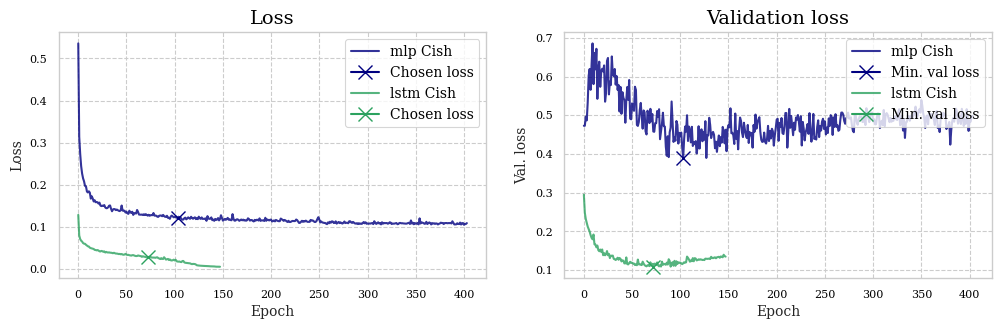

Model prediction scores
+-------------------+-------------+------------+
|       Model       | Train score | Test score |
+-------------------+-------------+------------+
|   linear model A  |    0.3234   |   0.0673   |
|       mlp A       |    0.6761   |   0.3496   |
|       lstm A      |    0.6889   |  -0.4475   |
| linear model Cish |    0.6158   |   0.5949   |
|      mlp Cish     |    0.8418   |   0.5287   |
|     lstm Cish     |    0.8771   |  -0.6814   |
+-------------------+-------------+------------+


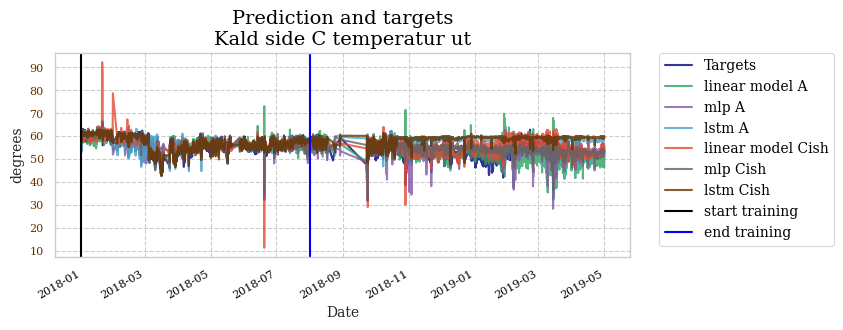

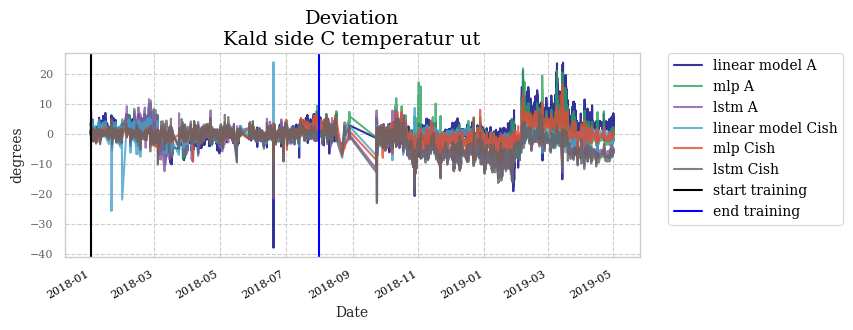

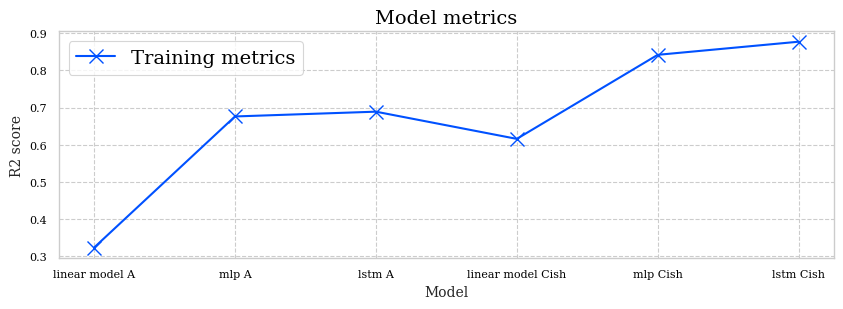

In [1]:
# %load example_F_features_comparison.py
import src.core as mlApi
from src.utils.plots import (plotModelPredictions, plotModelScores, getPlotColors)
from src.utils.prints import (printModelScores)
import matplotlib.pyplot as plt

colors = getPlotColors()

columnsLists = []
deviationsLists= []
names = []
trainmetrics = []
testmetrics = []

# define dataset specifics
filename = "../master-thesis-db/datasets/F/data2_30min.csv"

columns = [
	['FYN0111', 'Gasseksport rate', 'MSm^3/d'],
	['FT0111', 'Gasseksport molvekt','g/mole'],
	['TT0102_MA_Y', 'Varm side A temperatur inn', 'degrees'],
	['TIC0101_CA_YX', 'Varm side A temperatur ut', 'degrees'],
	['TT0104_MA_Y', 'Varm side B temperatur inn', 'degrees'],
	['TIC0103_CA_YX', 'Varm side B temperatur ut', 'degrees'],
	['TT0106_MA_Y', 'Varm side C temperatur inn', 'degrees'],
	['TIC0105_CA_YX', 'Varm side C temperatur ut', 'degrees'],
	['TI0115_MA_Y', 'Scrubber temperatur ut', 'degrees'],
	['PDT0108_MA_Y', 'Varm side A trykkfall', 'Bar'],
	['PDT0119_MA_Y', 'Varm side B trykkfall', 'Bar'],
	['PDT0118_MA_Y', 'Varm side C trykkfall', 'Bar'],
	['PIC0104_CA_YX', 'Innløpsseparator trykk', 'Barg'],
	['TIC0425_CA_YX', 'Kald side temperatur inn', 'degrees'],
	['TT0651_MA_Y', 'Kald side A temperatur ut', 'degrees'],
	['TT0652_MA_Y', 'Kald side B temperatur ut', 'degrees'],
	['TT0653_MA_Y', 'Kald side C temperatur ut', 'degrees'],
	['TIC0101_CA_Y', 'Kald side A ventilåpning', '%'],
	['TIC0103_CA_Y', 'Kald side B ventilåpning', '%'],
	['TIC0105_CA_Y', 'Kald side C ventilåpning', '%'],
]

traintime = [
        ["2018-01-01 00:00:00", "2018-08-01 00:00:00"],
    ]

testtime = [
    "2018-01-01 00:00:00",
    "2019-05-01 00:00:00"
]

targetColumns = [
	'TT0653_MA_Y',
]

models = ['A', 'Cish']

irrelevantColumnsList = [
	# Model A:
	#  Target: C T out
	#  Featers: P T in, P T out, P flow, C T in 
	[
		'FT0111',
		'PDT0108_MA_Y',
		'PDT0119_MA_Y',
		'PDT0118_MA_Y',
		'TT0104_MA_Y',
		'TIC0103_CA_YX',
		'TI0115_MA_Y',
		'TT0652_MA_Y',
		'TIC0103_CA_Y',
		'PIC0104_CA_YX',
		'TIC0101_CA_Y',
		'TT0102_MA_Y',
		'TIC0101_CA_YX',
		'TT0651_MA_Y',
		'TIC0105_CA_Y',
	],
	# Model Cish:
	#  Target: C T out
	#  Featers: P T in, P T out, P flow, C T in, C valve
	[
		'FT0111',
		'PDT0108_MA_Y',
		'PDT0119_MA_Y',
		'PDT0118_MA_Y',
		'TT0104_MA_Y',
		'TIC0103_CA_YX',
		'TI0115_MA_Y',
		'TT0652_MA_Y',
		'TIC0103_CA_Y',
		'PIC0104_CA_YX',
		'TIC0101_CA_Y',
		'TT0102_MA_Y',
		'TIC0101_CA_YX',
		'TT0651_MA_Y',
	],
]

for i, irrelevantColumns in enumerate(irrelevantColumnsList):
    mlApi.reset()
    df = mlApi.initDataframe(filename, columns, irrelevantColumns)
    df_train, df_test = mlApi.getTestTrainSplit(traintime, testtime)
    X_train, y_train, X_test, y_test = mlApi.getFeatureTargetSplit(targetColumns)
    linear_model = mlApi.Linear_Regularized("linear model " + models[i])
    mlp_model = mlApi.MLP("mlp " + models[i], layers=[64, 64], dropout=0.2, epochs=1000, verbose=0)
    lstm_model = mlApi.LSTM("lstm " + models[i], layers=[64, 64], dropout=0.2, recurrentDropout=0.2, epochs=250, enrolWindow=6)

    modelList = [
        linear_model,
        mlp_model,
        lstm_model,
    ]

    mlApi.initModels(modelList)
    retrain=False
    mlApi.trainModels(retrain)

    modelNames, metrics_train, metrics_test, columnsList, deviationsList = mlApi.predictWithModels(plot=False)

    if i < 1:
        columnsLists = columnsList
        deviationsLists = deviationsList
        all_names = modelNames
        all_train_metrics = metrics_train
        all_test_metrics = metrics_test
    else:
        for j_target in range(len(columnsList)):
            for k_model in range(1, len(columnsList[j_target])):
                columnsLists[j_target].append(columnsList[j_target][k_model])
            for k_model in range(0, len(deviationsList[j_target])):
                deviationsLists[j_target].append(deviationsList[j_target][k_model])
        all_names = [*all_names, *modelNames]
        all_train_metrics = [*all_train_metrics, *metrics_train]
        all_test_metrics = [*all_test_metrics, *metrics_test]


    names.append(modelNames)
    trainmetrics.append(metrics_train)
    testmetrics.append(metrics_test)

indexColumn = mlApi._indexColumn
columnDescriptions = mlApi._columnDescriptions
columnUnits = mlApi._columnUnits
traintime = mlApi._traintime

for i in range(len(deviationsLists)):
	for j in range(len(deviationsLists[i])):
		deviationsLists[i][j][3] = colors[j]

for i in range(len(columnsLists)):
	for j in range(len(columnsLists[i])):
		columnsLists[i][j][3] = colors[j]

printModelScores(
    all_names,
    all_train_metrics,
    all_test_metrics,
)
plotModelPredictions(
    plt,
    deviationsLists,
    columnsLists,
    indexColumn,
    columnDescriptions,
    columnUnits,
    traintime,
    interpol=False,
)
plotModelScores(
    plt,
    all_names,
    all_train_metrics,
    all_test_metrics,
)